## <Center> Data Generation for Admissions and Discharges</center>

## Importing librabries

In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Adding Scaling Factor

In [2]:
# List of values specifying the number of IDs to generate for each month
original_num_ids_list = [55,41,50,44,45,55,41,40,47,53,50,52]

# Calculate the total number of IDs generated in a year
total_ids_in_year = sum(original_num_ids_list)

# Desired total count of data
desired_total_count = 22483

# Calculate the scaling factor
scaling_factor = desired_total_count / total_ids_in_year

print(f"Scaling factor to achieve {desired_total_count} data points: {scaling_factor}")

Scaling factor to achieve 22483 data points: 39.23734729493892


## Generating Data for:
 - Admission Date  
 - Discharge Date  
 - Patient ID  
 - Mode Of Arrival  
 - Disposition

#### Initializing variables

In [3]:
# Set a seed for reproducibility (optional)
random.seed(2020)

# List of values specifying the number of IDs to generate for each month
original_num_ids_list = [55, 41, 50, 44, 45, 55, 41, 40, 47, 53, 50, 52]

# Desired total count of data
desired_total_count = 22483

# Calculate the scaling factor
scaling_factor = desired_total_count / total_ids_in_year
print('scaling_factor:',scaling_factor)

# Calculate the scaled number of IDs for each month
num_ids_list = [int(original_num_ids * scaling_factor) for original_num_ids in original_num_ids_list]

# Define the start and end years, including a leap year
start_year = 2015
end_year = 2020

# Define the mode_of_arrival options
mode_of_arrival_options = ['Ambulance', 'Own Vehicle', 'Walk In', 'Other']

# Define the disposition options
disposition_options = ['HOME', 'ADMITTED', 'ELOPED', 'TRANSFER', 'LEFT WITHOUT BEING SEEN', 'OTHER', 'LEFT AGAINST MEDICAL ADVICE', 'EXPIRED']


scaling_factor: 39.23734729493892


In [4]:

# Create an empty list to store data
data = []

# Loop through each year
for year in range(start_year, end_year + 1):
    # Determine if the current year is a leap year
    is_leap_year = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

    # Loop through each month
    for month, num_ids in enumerate(num_ids_list, start=1):
        # Determine the number of days in the current month
        if month == 2 and is_leap_year:
            last_day = 29  # February in a leap year
        else:
            last_day = 28  # Initialize with a safe value
            try:
                last_day = (datetime(year, month + 1, 1) - timedelta(days=1)).day
            except ValueError:
                pass

        # Generate random IDs, start dates, end dates, mode_of_arrival, and disposition for the current month
        for _ in range(num_ids):
            day = random.randint(1, last_day)  # Generate a random day within the month
            start_date = datetime(year, month, day)
            end_date = start_date + timedelta(days=random.randint(1, 30))  # Generate a random end date within 30 days
            id_value = random.randint(1000000, 99999999) ## Generate 8 digits Patient ID's 
            arrival_mode = random.choice(mode_of_arrival_options)
            disposition = random.choice(disposition_options)
            data.append([start_date, end_date, id_value, arrival_mode, disposition])
    print(year,len(data))

# Create a Pandas DataFrame from the data
master_data = pd.DataFrame(data, columns=["Admission Date", "Discharge Date", "Patient ID", "Mode of Arrival", "Disposition"])

# Save the DataFrame to a CSV file
master_data.to_csv("data_2015_to_2020_scaling_with_end_date_mode_of_arrival_disposition.csv", index=False)

print("DataFrame and CSV file saved successfully.")

# Print the first few rows of the DataFrame
master_data.head()

2015 22477
2016 44954
2017 67431
2018 89908
2019 112385
2020 134862
DataFrame and CSV file saved successfully.


,Admission Date,Discharge Date,Patient ID,Mode of Arrival,Disposition
0,2015-01-20,2015-02-09,24424196,Other,EXPIRED
1,2015-01-16,2015-01-28,57279250,Own Vehicle,ADMITTED
2,2015-01-15,2015-02-10,33220210,Own Vehicle,LEFT AGAINST MEDICAL ADVICE
3,2015-01-22,2015-01-29,82137812,Own Vehicle,EXPIRED
4,2015-01-15,2015-01-19,95712788,Own Vehicle,EXPIRED


### EDA on the dataset 

##### Total count of Patient ID's

In [5]:
# Calculate the total count of IDs in the dataset
total_id_count = master_data["Patient ID"].count()

# Group the data by "ID" and get the count of unique IDs
unique_id_count = master_data.groupby("Patient ID")["Patient ID"].count().count()

print(f"Total number of IDs: {total_id_count}")
print(f"Unique count of IDs: {unique_id_count}")

Total number of IDs: 134862
Unique count of IDs: 134765


#### Count of ID's at Year-Month level 

In [6]:
# Convert "Start Date" column to datetime
master_data['Admission Date'] = pd.to_datetime(master_data['Admission Date'])

# Extract the month from the "Start Date" and create a new column "Start Month"
master_data['Admission Date Year Month'] = master_data['Admission Date'].dt.strftime('%Y-%m')

# Group the data by "Start Month" and get the average count of IDs for each unique start month
start_month_count_ids = master_data.groupby("Admission Date Year Month")["Patient ID"].count().reset_index()

# Rename the columns for clarity
start_month_count_ids.columns = ["Admission Date Year Month", "Patient ID Count"]

# Print the resulting DataFrame
start_month_count_ids.head()

,Admission Date Year Month,Patient ID Count
0,2015-01,2158
1,2015-02,1608
2,2015-03,1961
3,2015-04,1726
4,2015-05,1765


#### Count of ID's at day level

In [7]:
start_date_counts = master_data.groupby("Admission Date")["Patient ID"].count().reset_index()

# Rename the columns for clarity
start_date_counts.columns = ["Admission Date", "Patient ID Count"]

# Print the resulting DataFrame
start_date_counts.head()

,Admission Date,Patient ID Count
0,2015-01-01,61
1,2015-01-02,75
2,2015-01-03,81
3,2015-01-04,65
4,2015-01-05,71


### Graph to see Trend in data

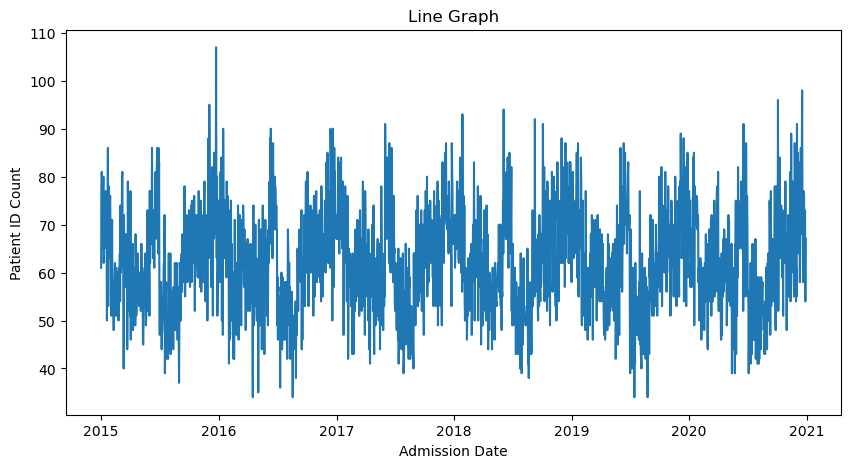

In [8]:
x= start_date_counts["Admission Date"]
y= start_date_counts["Patient ID Count"]

plt.figure(figsize=(10, 5))
# Create a line graph
plt.plot(x, y)


# Add labels and a title
plt.xlabel('Admission Date')
plt.ylabel('Patient ID Count')
plt.title('Line Graph')

# Display the graph
plt.show()